In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
crime_state = pd.read_csv('E:/New folder/crime_by_state.csv')
crime_state.head()

,STATE/UT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,2001,45,69,22,3,2,6,518,950,312,1006
1,ANDHRA PRADESH,2002,60,98,18,0,4,12,568,830,459,1336
2,ANDHRA PRADESH,2003,33,79,27,1,15,4,615,1234,165,1386
3,ANDHRA PRADESH,2004,39,66,28,0,7,20,474,1319,68,1234
4,ANDHRA PRADESH,2005,37,74,21,0,0,9,459,1244,61,1212


In [10]:
## Total crime by State, sum of all years
crime_by_state = crime_state.groupby('STATE/UT').sum()
crime_by_state = crime_by_state.drop(['Year'], axis=1)
crime_by_state = crime_by_state.drop(['TOTAL (ALL-INDIA)', 'TOTAL (STATES)', 'TOTAL (UTs)'])
crime_by_state

,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
STATE/UT,,,,,,,,,,
A & N ISLANDS,0,0,0,0,0,0,0,0,0,0
ANDHRA PRADESH,556,1110,238,9,39,136,7248,15160,1511,17412
ARUNACHAL PRADESH,1,0,0,0,1,0,0,0,0,0
ASSAM,57,57,96,14,33,25,341,3,1,318
BIHAR,286,284,127,29,77,309,4524,23425,466,3814
CHANDIGARH,0,2,0,0,0,0,0,6,0,4
CHHATTISGARH,117,661,43,1,13,17,743,923,24,2672
D & N HAVELI,0,0,2,0,0,0,0,0,0,5
DAMAN & DIU,0,0,0,0,0,0,0,0,0,5


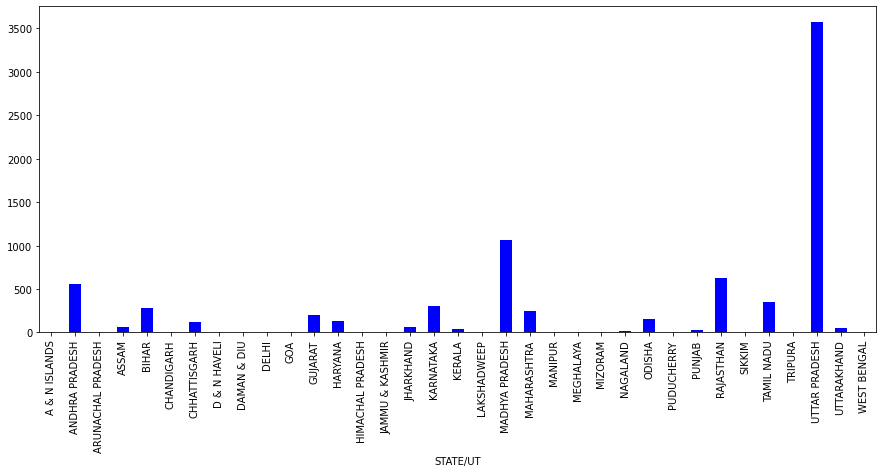

In [19]:
## Plotting murders state-wise
state_murders = crime_by_state['Murder']
fig = plt.figure()
state_murders.plot.bar(figsize=(15,6),color='blue')

Text(0.5, 1.0, 'Robbery')

<Figure size 432x288 with 0 Axes>

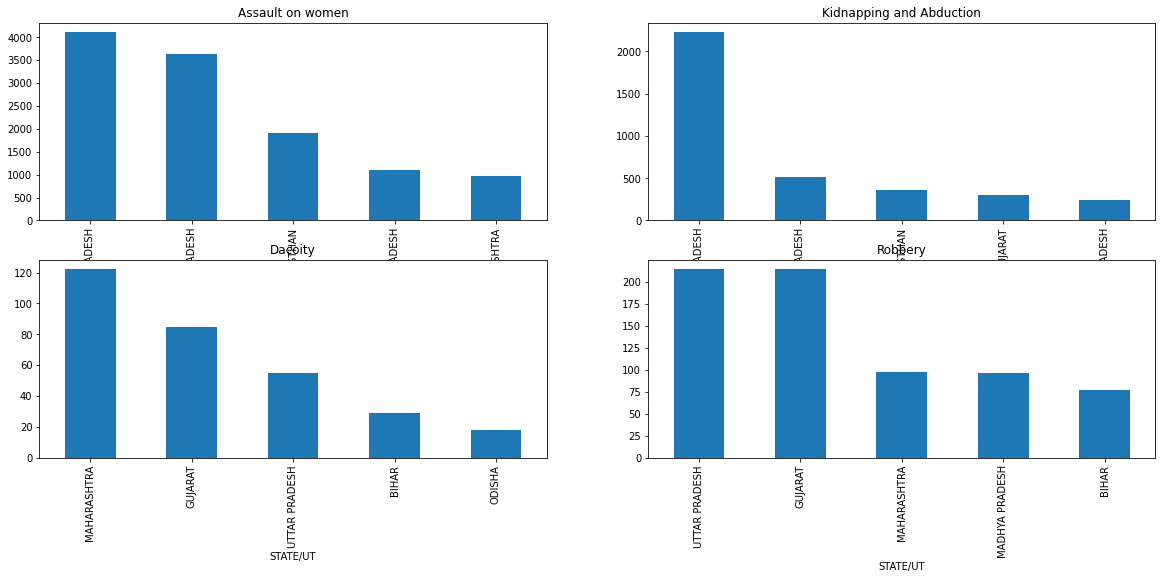

In [48]:
# Plotting subplots for top 5 crimes
cw = crime_by_state.sort_values(by = 'Assault on women', ascending=False).head()
ck = crime_by_state.sort_values(by = 'Kidnapping and Abduction', ascending=False).head()
cd = crime_by_state.sort_values(by = 'Dacoity', ascending=False).head()
cr = crime_by_state.sort_values(by = 'Robbery', ascending=False).head()
#cw = crime_by_state['Assault on women']

plt.figure()
f, ((a1, a2), (a3, a4)) = plt.subplots(2,2, figsize=(20,8))
cw['Assault on women'].plot.bar(ax=a1)
ck['Kidnapping and Abduction'].plot.bar(ax=a2)
cd['Dacoity'].plot.bar(ax=a3)
cr['Robbery'].plot.bar(ax=a4)

a1.set_title('Assault on women')
a2.set_title('Kidnapping and Abduction')
a3.set_title('Dacoity')
a4.set_title('Robbery')

Text(0.5, 1.0, 'Histograph')

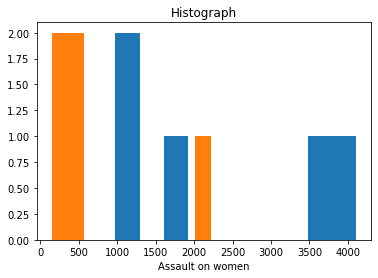

In [54]:
plt.hist(cw['Assault on women'])
plt.hist(cw['Kidnapping and Abduction'])
plt.xlabel('Assault on women')
plt.title('Histograph')

Text(0.5, 1.0, 'Robbery vs Dacoity')

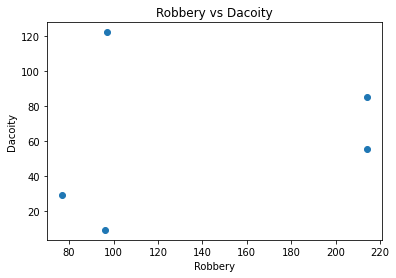

In [55]:
plt.scatter(cr['Robbery'], cr['Dacoity'])
plt.xlabel('Robbery')
plt.ylabel('Dacoity')
plt.title('Robbery vs Dacoity')

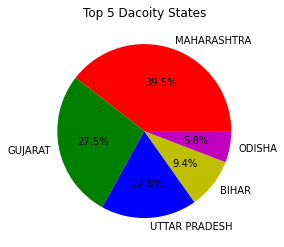

In [74]:
label = ['MAHARASHTRA', 'GUJARAT', 'UTTAR PRADESH', 'BIHAR', 'ODISHA']
plt.pie(cd['Dacoity'], labels=label, colors=['r', 'g', 'b', 'y', 'm'], autopct = '%1.1f%%')
#plt.legend()
plt.title('Top 5 Dacoity States')
plt.show()